In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
# Load MERFISH data
merData = ad.read_h5ad("/data/merfish_609882_AIT17.1_annotated_TH_ZI_only_2023-02-16_00-00-00/atlas_brain_609882_AIT17_1_annotated_TH_ZI_only.h5ad")

# Subset to neuronal
merData = merData[merData.obs["division_id_label"].isin(["3 PAL-sAMY-TH-HY-MB-HB neuronal"])]

In [3]:
merData.obs['Level1_id_label'].value_counts(normalize=False).loc[lambda x: x>100]

8_TH               144144
10_CNU-HY GABA      23239
14_MB Glut           4963
18_MB Gaba           4441
12_CNU-HYa Glut      1116
13_HY Glut            522
17_MY Glut            282
Name: Level1_id_label, dtype: int64

In [4]:
# Load sequencing data
seqData = ad.read_h5ad("/data/rnaseq_AIT17.2_2022-12-15_12-00-00/rnaseq/processed.U19_TH-EPI.postQC.h5ad", backed=False)

data = seqData[seqData.obs['Level1_id_label']=='8_TH']

In [5]:
data

View of AnnData object with n_obs × n_vars = 126756 × 32285
    obs: 'sample_id', 'cl', 'cluster_label', 'Level2_id_label', 'Level1_id_label', 'supertype_id_label', 'class_id_label', 'nt_type_label', 'cluster_id.AIT16', 'library_prep', 'gene.counts.0', 'doublet_score', 'roi', 'umi.counts', 'qc.score', 'method', 'region_label', 'region_id', 'sex', 'external_donor_name', 'age', 'platform', 'knn.dist', 'knn.dist.z', 'medical_conditions', 'broad_region'
    uns: 'Level2_id_label_colors', 'cluster_label_colors'
    obsm: 'EMBED2', 'EMBED3'

In [7]:
data.obs['nt_type_label'].value_counts()

Glut    123236
Chol      3520
Name: nt_type_label, dtype: int64

In [9]:
supertypes = data.obs['supertype_id_label'].value_counts(normalize=False).loc[lambda x: x>0]
supertypes.sort_index()

248 MH Tac2 Glut_1              2335
249 MH Tac2 Glut_2               887
250 MH Tac2 Glut_3              4351
251 MH Tac2 Glut_4               159
252 MH Tac2 Glut_5               331
253 LH Pou4f1 Sox1 Glut_1       1269
254 LH Pou4f1 Sox1 Glut_2        657
255 LH Pou4f1 Sox1 Glut_3        529
256 LH Pou4f1 Sox1 Glut_4        321
257 AD Serpinb7 Glut             729
258 AV Col27a1 Glut             7519
259 PVT-PT Ntrk1 Glut_1          686
260 PVT-PT Ntrk1 Glut_2         5544
261 PVT-PT Ntrk1 Glut_3         1326
262 PVT-PT Ntrk1 Glut_4         1947
263 PVT-PT Ntrk1 Glut_5          648
264 PVT-PT Ntrk1 Glut_6          168
265 CM-IAD-CL-PCN Glut_1        5617
266 CM-IAD-CL-PCN Glut_2        3173
267 CM-IAD-CL-PCN Glut_3         848
268 CM-IAD-CL-PCN Glut_4        3453
269 CM-IAD-CL-PCN Glut_5         568
270 TH Prkcd Grin2c Glut_1      7746
271 TH Prkcd Grin2c Glut_10     4303
272 TH Prkcd Grin2c Glut_11     1922
273 TH Prkcd Grin2c Glut_12     1584
274 TH Prkcd Grin2c Glut_13     3119
2

In [10]:
sorted(data.obs['Level2_id_label'].unique())

['63_MH Tac2 Glut',
 '64_LH Pou4f1 Sox1 Glut',
 '65_AD Serpinb7 Glut',
 '66_AV Col27a1 Glut',
 '67_PVT-PT Ntrk1 Glut',
 '68_CM-IAD-CL-PCN Glut',
 '69_TH Prkcd Grin2c Glut',
 '70_RE-Xi Nox4 Glut',
 '71_MG-POL-SGN Glut',
 '72_PF Fzd5 Glut']

In [11]:
expand = ['65_AD Serpinb7 Glut', '66_AV Col27a1 Glut', '69_TH Prkcd Grin2c Glut']
data.obs['grouped_cell_type'] = data.obs['Level2_id_label'].astype(str)
data.obs.loc[lambda df: df['grouped_cell_type'].isin(expand), 'grouped_cell_type'] = data.obs.loc[lambda df: df['grouped_cell_type'].isin(expand), 'supertype_id_label']
data.obs['grouped_cell_type'].value_counts()

<ipython-input-11-e94c9ee6ecd9>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  data.obs['grouped_cell_type'] = data.obs['Level2_id_label'].astype(str)


68_CM-IAD-CL-PCN Glut          13659
277 TH Prkcd Grin2c Glut_3     11288
280 TH Prkcd Grin2c Glut_6     10767
67_PVT-PT Ntrk1 Glut           10319
276 TH Prkcd Grin2c Glut_2      8352
63_MH Tac2 Glut                 8063
270 TH Prkcd Grin2c Glut_1      7746
258 AV Col27a1 Glut             7519
72_PF Fzd5 Glut                 6829
70_RE-Xi Nox4 Glut              6151
279 TH Prkcd Grin2c Glut_5      5614
282 TH Prkcd Grin2c Glut_8      4754
271 TH Prkcd Grin2c Glut_10     4303
274 TH Prkcd Grin2c Glut_13     3119
281 TH Prkcd Grin2c Glut_7      2987
283 TH Prkcd Grin2c Glut_9      2900
64_LH Pou4f1 Sox1 Glut          2776
71_MG-POL-SGN Glut              2115
272 TH Prkcd Grin2c Glut_11     1922
275 TH Prkcd Grin2c Glut_14     1787
273 TH Prkcd Grin2c Glut_12     1584
278 TH Prkcd Grin2c Glut_4      1473
257 AD Serpinb7 Glut             729
Name: grouped_cell_type, dtype: int64

In [12]:
len(data.obs['grouped_cell_type'].unique())**2

529

In [13]:
data.obs['method'].value_counts()

10Xv2    74168
10Xv3    52588
Name: method, dtype: int64

In [23]:
import dprime
import scipy.spatial.distance as distance
from diskcache import Cache

cache = Cache("/scratch/cache")

@cache.memoize()
def tx_dprime(cluster_label, features=None, type_list=None, n_folds=5, r=3, zero_inflated=True, n_subsample=1000, **kwargs ):
    global data
    adata = data[data.obs.groupby(cluster_label).sample(n_subsample, replace=True).index]
    df = adata.obs
    type_labels = df[cluster_label]
    data = adata.X if features is None else adata[:, features].X
    if type_list is None:
        type_list = type_labels.unique()
    # d-prime calculation
    if zero_inflated:
        dprime_results = dprime.zinb_dprime(
            data, type_list, type_labels, n_folds=n_folds,
            r=r, **kwargs)
    else:
        dprime_results = dprime.negative_binomial_dprime(
            data, type_list, type_labels, n_folds=n_folds,
            r=r, **kwargs)

    dprime_mat = distance.squareform(
        [np.abs(dprime_results[k]["dprime"]) for k in dprime_results])
    output_dprime_df = pd.DataFrame(dprime_mat, index=type_list, columns=type_list)
#     return output_dprime_df, dprime_results
    return output_dprime_df


In [24]:
result = tx_dprime(cluster_label='grouped_cell_type', zero_inflated=False, r=1)

0
50
100
150
200
250


In [45]:
result.to_csv("../resources/grouped_supertype_dprime.csv")

In [34]:
import re
labels = dprime.columns
labels = [' '.join(re.split(' |_', x)[1:]) for x in labels]
labels

['AD Serpinb7 Glut',
 'AV Col27a1 Glut',
 'TH Prkcd Grin2c Glut 1',
 'TH Prkcd Grin2c Glut 10',
 'TH Prkcd Grin2c Glut 11',
 'TH Prkcd Grin2c Glut 12',
 'TH Prkcd Grin2c Glut 13',
 'TH Prkcd Grin2c Glut 14',
 'TH Prkcd Grin2c Glut 2',
 'TH Prkcd Grin2c Glut 3',
 'TH Prkcd Grin2c Glut 4',
 'TH Prkcd Grin2c Glut 5',
 'TH Prkcd Grin2c Glut 6',
 'TH Prkcd Grin2c Glut 7',
 'TH Prkcd Grin2c Glut 8',
 'TH Prkcd Grin2c Glut 9',
 'MH Tac2 Glut',
 'LH Pou4f1 Sox1 Glut',
 'PVT-PT Ntrk1 Glut',
 'CM-IAD-CL-PCN Glut',
 'RE-Xi Nox4 Glut',
 'MG-POL-SGN Glut',
 'PF Fzd5 Glut']

In [41]:
dprime = result.copy()

dprime.index = labels
dprime.columns = labels
order = ['AD Serpinb7 Glut',
 'AV Col27a1 Glut',
 'TH Prkcd Grin2c Glut 9',
 'TH Prkcd Grin2c Glut 13',
 'TH Prkcd Grin2c Glut 10',
 'TH Prkcd Grin2c Glut 4',
 'TH Prkcd Grin2c Glut 6',
 'TH Prkcd Grin2c Glut 7',
 'TH Prkcd Grin2c Glut 11',
 'TH Prkcd Grin2c Glut 12',
 'TH Prkcd Grin2c Glut 8',
 'TH Prkcd Grin2c Glut 14',
 'TH Prkcd Grin2c Glut 1',
 'TH Prkcd Grin2c Glut 2',
 'TH Prkcd Grin2c Glut 3',
 'TH Prkcd Grin2c Glut 5',
 'PVT-PT Ntrk1 Glut',
 'CM-IAD-CL-PCN Glut',
 'RE-Xi Nox4 Glut',
 'MG-POL-SGN Glut',
 'PF Fzd5 Glut',
 'MH Tac2 Glut',
 'LH Pou4f1 Sox1 Glut',
        ]
dprime = dprime.loc[order, order]
order[order.index('TH Prkcd Grin2c Glut 9')] += ' (AM)'
order[order.index('TH Prkcd Grin2c Glut 10')] += ' (MD)'
order[order.index('TH Prkcd Grin2c Glut 13')] += ' (VM/VAL)'
dprime.index = order
dprime.columns = order

(0.0, 23.0, 23.0, 0.0)

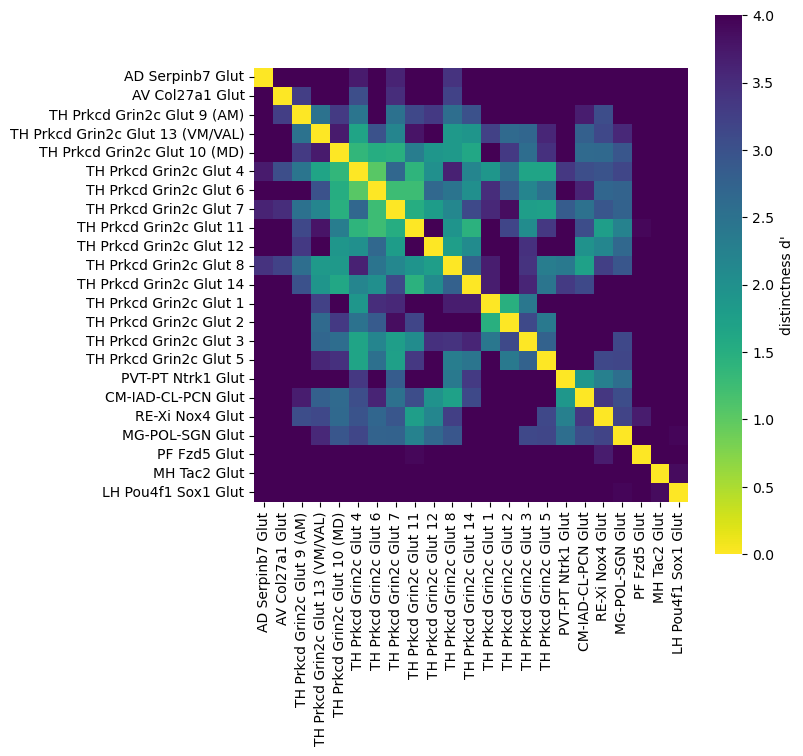

In [43]:
plt.figure(figsize=(7,7))
sns.heatmap(dprime, cmap='viridis_r', vmin=0, vmax=4, cbar=True, cbar_kws=dict(label="distinctness d'"))
plt.axis('image')

In [27]:
ax = plt.gca()
args = dict(linewidth=3, facecolor='none')
boxes = [
    ax.add_patch(Rectangle((0,0), 3, 3, edgecolor=palette_subclass['LAMP5'], **args)),
    ax.add_patch(Rectangle((3,3), 2, 2, edgecolor=palette_subclass['MC4R'], **args)),
    ax.add_patch(Rectangle((5,5), 2, 2, edgecolor=palette_subclass['PAX6'], **args)),
    ax.add_patch(Rectangle((7,7), 1, 1, edgecolor=palette_subclass['L1 VIP'], **args)),
    ax.add_patch(Rectangle((8,8), 2, 2, edgecolor=palette_subclass['other'], **args)),
]
plt.legend(boxes, ['LAMP5', 'MC4R','PAX6','L1 VIP','other'], title='subclass',
           bbox_to_anchor=(1.4, 0.5), loc='center left')
plt.show()

NameError: name 'dprime' is not defined

In [51]:
types = ["277 TH Prkcd Grin2c Glut_3",
         "280 TH Prkcd Grin2c Glut_6"
        ]

In [30]:
facs_dprime = tx_dprime(seqData, cluster_label='supertype_id_label', type_list=types, zero_inflated=False, r=1)

0


In [31]:
facs_dprime

,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.702156
280 TH Prkcd Grin2c Glut_6,3.702156,0.000000


In [54]:
# higher r / lower dispersion
tx_dprime(seqData, cluster_label='supertype_id_label', type_list=types, zero_inflated=False, r=10)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.811872
280 TH Prkcd Grin2c Glut_6,3.811872,0.000000


In [32]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=seqData.var_names[:10000], type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.464626
280 TH Prkcd Grin2c Glut_6,3.464626,0.000000


In [41]:
sc.pp.highly_variable_genes(seqData, flavor='seurat_v3', n_top_genes=10000)

/opt/conda/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [42]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=seqData.var.query('highly_variable').index, type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.535094
280 TH Prkcd Grin2c Glut_6,3.535094,0.000000


In [43]:
hvg = sc.experimental.pp.highly_variable_genes(seqData, n_top_genes=10000, inplace=False)

/opt/conda/lib/python3.9/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:73: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


In [45]:
tx_dprime(seqData, cluster_label='supertype_id_label', features=hvg.query('highly_variable').index, type_list=types, zero_inflated=False, r=1)

0


,277 TH Prkcd Grin2c Glut_3,280 TH Prkcd Grin2c Glut_6
277 TH Prkcd Grin2c Glut_3,0.000000,3.219919
280 TH Prkcd Grin2c Glut_6,3.219919,0.000000
